# Esercitazione 11

**6 Maggio 2025**

*Gradiente e gradiente coniugato*

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify

In [2]:
def steepestdescent(A,b,x0,itmax,tol):

    x=x0.copy()
    r=A@x-b
    p=-r
    it=0
    normb=np.linalg.norm(b)

    errore=np.linalg.norm(r)/normb

    vec_sol=[]
    vec_sol.append(x.copy())
    vec_r=[]
    vec_r.append(errore)

    while errore>=tol and it<itmax:
        it=it+1
        
        Ap=A@p
        alpha=-(r.T@p)/(p.T@Ap)
        
        x=x+alpha*p
        r=r+alpha*Ap

        vec_sol.append(x.copy())
        errore=np.linalg.norm(r)/normb
        vec_r.append(errore)
        p=-r # Max descent (Opposite of gradient)
        
    array_iterati=np.vstack([arr.T for arr in vec_sol]) # Only for graphical purpose

    return x,vec_r, array_iterati, it

## Esercizio 41-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [3]:
def steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol):

    x=x0.copy()
    r=A@x-b
    p=-r
    it=0
    normb=np.linalg.norm(b)

    errore=np.linalg.norm(r)/normb

    # Only for graphics
    plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
    
    vec_sol=[]
    vec_sol.append(x.copy())
    vec_r=[]
    vec_r.append(errore)

    while errore>=tol and it<itmax:
        it=it+1
        
        Ap=A@p
        alpha=-(r.T@p)/(p.T@Ap)
        
        x=x+alpha*p
        r=r+alpha*Ap

        # Only for graphics
        plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'r*')

        vec_sol.append(x.copy())
        errore=np.linalg.norm(r)/normb
        vec_r.append(errore)
        p=-r # Max descent (Opposite of gradient)
        
    array_iterati=np.vstack([arr.T for arr in vec_sol]) # Only for graphical purpose

    return x,vec_r, array_iterati, it

In [4]:
def conjugateGradientCL(A,b,x0,itmax,X,Y,Z,f,tol):

    x=x0.copy()
    r=A@x-b
    p=-r
    it=0
    normb=np.linalg.norm(b)

    errore=np.linalg.norm(r)/normb

    # Only for graphics
    plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
    
    vec_sol=[]
    vec_sol.append(x.copy())
    vec_r=[]
    vec_r.append(errore)

    while errore>=tol and it<itmax:
        it=it+1
        
        Ap=A@p

        save=(r.T@r)
        alpha=save/(Ap.T@p)
        
        x=x+alpha*p
        r=r+alpha*Ap

        # Only for graphics
        plt.contour(X,Y,Z,levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'bo')

        vec_sol.append(x.copy())
        errore=np.linalg.norm(r)/normb
        vec_r.append(errore)

        gamma=(r.T@r)/save
        p=-r+gamma*p # Max descent (Opposite of gradient)
        
    array_iterati=np.vstack([arr.T for arr in vec_sol]) # Only for graphical purpose

    return x,vec_r, array_iterati, it

In [5]:
def conjugateGradient(A,b,x0,itmax,tol):

    x=x0.copy()
    r=A@x-b
    p=-r
    it=0
    normb=np.linalg.norm(b)

    errore=np.linalg.norm(r)/normb
    
    vec_sol=[]
    vec_sol.append(x.copy())
    vec_r=[]
    vec_r.append(errore)

    while errore>=tol and it<itmax:
        it=it+1
        
        Ap=A@p

        save=(r.T@r)
        alpha=save/(Ap.T@p)
        
        x=x+alpha*p
        r=r+alpha*Ap

        vec_sol.append(x.copy())
        errore=np.linalg.norm(r)/normb
        vec_r.append(errore)

        gamma=(r.T@r)/save
        p=-r+gamma*p # Max descent (Opposite of gradient)
        
    array_iterati=np.vstack([arr.T for arr in vec_sol]) # Only for graphical purpose

    return x,vec_r, array_iterati, it

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

## Test didattici per il caso n=2, visualizzando le curve di livello

In [21]:
def f(x,A,b):
    Ax=A@x
    xAx=x.T@Ax
    bx=b.T@x
    return 0.5*xAx-bx

/tmp/ipykernel_23222/2287839363.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)


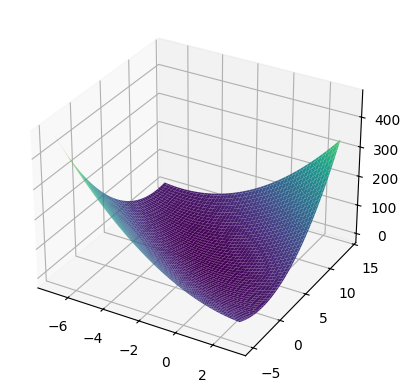

In [24]:
A=np.array([[8,4],[4,3]]) 
b=np.array([[8],[10]])
x=np.linspace(-7,3,100)
y=np.linspace(-5,14,100)
 
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(len(y)):
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the thing
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

# Show the graph
plt.show() 

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi l'errore ad ogni iterazione.

In [20]:
A=np.array([[8,4],[4,3]],dtype=float)
b=np.array([8.0,10]).reshape(2,1)
x0=np.zeros_like(b)

toll=1e-10
itmax=200

x_G_0,vet_r_G,vec_sol_G,it_G=steepestdescent(A,b,x0,itmax,toll)
print("Solution: ", x_G_0, "Iteration: ", it_G)

Solution:  [[-2.]
 [ 6.]] Iteration:  83


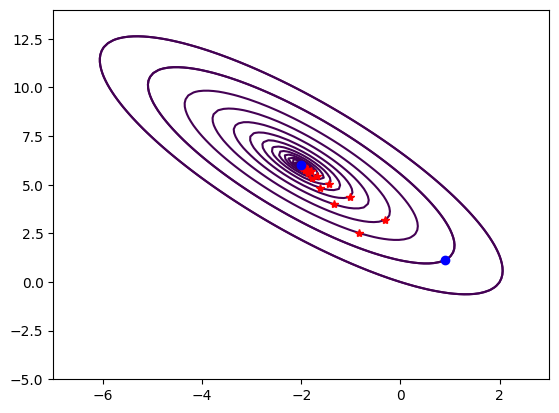

In [39]:
x_G_0,vet_r_G,vec_sol_G,it_G=steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,toll)
x_CG_0,vet_r_CG,vec_sol_CG,it_CG=conjugateGradient(A,b,x0,itmax,X,Y,Z,f,toll)

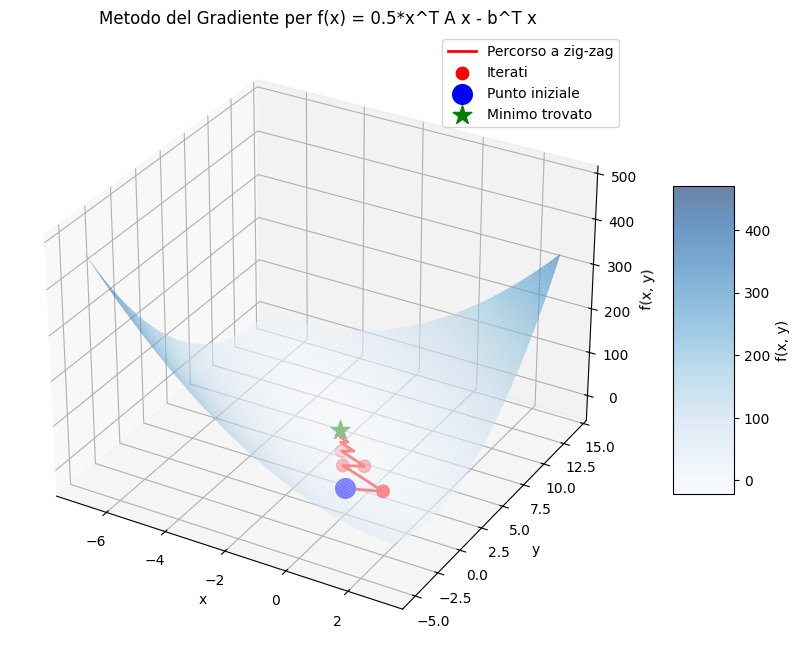

cond A 10.246950765959598


In [31]:
# Visualizzazione grafica 3D
# Creazione della griglia per la superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot della superficie

surf = ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.6, rstride=1, cstride=1, linewidth=0)

# Calcolo di z_iterates
z_iterates = np.array([f(vec_sol_G[i, :].reshape(2, 1), A, b) for i in range(vec_sol_G.shape[0])])

# Plot del percorso degli iterati
ax.plot(vec_sol_G[:, 0], vec_sol_G[:, 1], z_iterates.flatten(), color='red', linewidth=2, label='Percorso a zig-zag')
ax.scatter(vec_sol_G[:5, 0], vec_sol_G[:5, 1], z_iterates[:5].flatten(), color='red', s=80, label='Iterati')

# Punto iniziale e minimo

ax.scatter([x0[0, 0]], [x0[1, 0]], [f(x0, A, b)], color='blue', s=200, marker='o', label='Punto iniziale')
ax.scatter([x_G_0[0, 0]], [x_G_0[1, 0]], f(x_G_0,A,b), color='green', s=200, marker='*', label='Minimo trovato')

# Personalizzazione
ax.set_title(f'Metodo del Gradiente per f(x) = 0.5*x^T A x - b^T x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='f(x, y)')
plt.show()
print("cond A",np.linalg.norm(A))

In [ ]:
# Plot della superficie

surf = ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.6, rstride=1, cstride=1, linewidth=0)

# Calcolo di z_iterates
z_iterates = np.array([f(vec_sol_G[i, :].reshape(2, 1), A, b) for i in range(vec_sol_G.shape[0])])

# Plot del percorso degli iterati
ax.plot(vec_sol_G[:, 0], vec_sol_G[:, 1], z_iterates.flatten(), color='red', linewidth=2, label='Percorso a zig-zag')
ax.scatter(vec_sol_G[:5, 0], vec_sol_G[:5, 1], z_iterates[:5].flatten(), color='red', s=80, label='Iterati')

# Punto iniziale e minimo

ax.scatter([x0[0, 0]], [x0[1, 0]], [f(x0, A, b)], color='blue', s=200, marker='o', label='Punto iniziale')
ax.scatter([x_cg_0[0, 0]], [x_cg_0[1, 0]], f(x_cg_0,A,b), color='green', s=200, marker='*', label='Minimo trovato')

# Personalizzazione
ax.set_title(f'Metodo del Gradiente per f(x) = 0.5*x^T A x - b^T x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='f(x, y)')
plt.show()
print("cond A",np.linalg.norm(A))

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [7]:
def poisson(n):
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,3)+np.diag(f,-3)
    return A

In [16]:
toll=1e-10
itmax=200
n3=10
A3=poisson(n3)
b3=np.sum(A3,axis=1).reshape(n3,1)
print(A3,"\n",b3)

x0_3=np.zeros_like(b3)

x_G_0_3,vet_r_G_3,vec_sol_G_3,it_G_3=steepestdescent(A3,b3,x0_3,itmax,toll)
x_CG_0_3,vet_r_CG_3,vec_sol_CG_3,it_CG_3=conjugateGradient(A3,b3,x0_3,itmax,toll)
print("Iterations Gradient: ", it_G_3, " Solution: ", x_G_0_3)
print("Iterations Conjugate Gradient: ", it_CG_3, " Solution: ", x_CG_0_3)

[[ 4. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  4. -1.  0. -1.  0.  0.  0.  0.]
 [-1.  0. -1.  4. -1.  0. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  4. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  4. -1.  0. -1.  0.]
 [ 0.  0.  0. -1.  0. -1.  4. -1.  0. -1.]
 [ 0.  0.  0.  0. -1.  0. -1.  4. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  4. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.  4.]] 
 [[2.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]]
Iterations Gradient:  111  Solution:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Iterations Conjugate Gradient:  5  Solution:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

## In preparazione alla prossima esercitazione

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).